In [6]:
import pandas as pd

In [21]:
train = pd.read_csv(r'C:\Users\JH\Desktop\CreditCard\Data\train.csv', usecols = ['gender','car','reality','credit'])
test = pd.read_csv(r'C:\Users\JH\Desktop\CreditCard\Data\test.csv', usecols = ['gender','car','reality'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   26457 non-null  object 
 1   car      26457 non-null  object 
 2   reality  26457 non-null  object 
 3   credit   26457 non-null  float64
dtypes: float64(1), object(3)
memory usage: 826.9+ KB


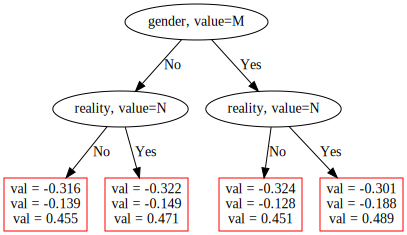

In [32]:
import numpy as np
from catboost import CatBoostClassifier, Pool

from catboost.datasets import titanic
titanic_df = titanic()

X = train.drop('credit',axis=1)
y = train.credit

is_cat = (X.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]
pool = Pool(X, y, cat_features=cat_features_index, feature_names=list(X.columns))

model = CatBoostClassifier(
    max_depth=3, verbose=False, max_ctr_complexity=2, iterations=2).fit(pool)

model.plot_tree(
    tree_idx=0,
    pool=pool
)

In [5]:
titanic_df

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               